HW4

Задание1. 
Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом. 2.1. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.

In [2]:
# Пункт 1

input_file = open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r")
hp_text = input_file.read()

print(hp_text)

CHAPTER ONE
THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but th

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

Задание 2.
Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [11]:
# Пункт 2

import string, re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

regex_wo_punctuation = re.compile('[%s]|«|»|”' % re.escape(string.punctuation))
hp_text_wo_punctuation = regex_wo_punctuation.sub('', hp_text)
hp_text_lc_wo_punctuation = hp_text_wo_punctuation.lower()

word_pos = nltk.pos_tag(nltk.word_tokenize(hp_text_lc_wo_punctuation))

lemmatizatizer = nltk.WordNetLemmatizer()
hp_text_lc_wo_punctuation_lemmatized = " ".join([lemmatizatizer.lemmatize(word_plus_pos_tag[0], get_wordnet_pos(word_plus_pos_tag[1])) for word_plus_pos_tag in word_pos])

print(hp_text_lc_wo_punctuation_lemmatized)

output = open("Harry_Potter_and_the_Sorcerers_Stone_Lemmatized_WithoutPunctuation_Lowercase.txt", "w+")
output.write(hp_text_lc_wo_punctuation_lemmatized)


chapter one the boy who live mr and mrs dursley of number four privet drive be proud to say that they be perfectly normal thank you very much they be the last people youd expect to be involve in anything strange or mysterious because they just didnt hold with such nonsense mr dursley be the director of a firm call grunnings which make drill he be a big beefy man with hardly any neck although he do have a very large mustache mr dursley be thin and blonde and have nearly twice the usual amount of neck which come in very useful a she spend so much of her time craning over garden fence spy on the neighbor the dursleys have a small son call dudley and in their opinion there be no finer boy anywhere the dursleys have everything they want but they also have a secret and their great fear be that somebody would discover it they didnt think they could bear it if anyone find out about the potter mrs potter be mrs dursleys sister but they hadnt meet for several year in fact mr dursley pretend she 

399185

In [12]:
from collections import Counter

words_number = len(hp_text_lc_wo_punctuation_lemmatized.split())
words_count = Counter(hp_text_lc_wo_punctuation_lemmatized.split())
words_frequency ={k: v/words_number for k, v in words_count.items()}
sorted_words_frequency = sorted(words_frequency.items(), key=lambda x: x[1], reverse=True)

print(sorted_words_frequency)

[('the', 0.04624712740681113), ('be', 0.03132911803274432), ('a', 0.027161423507874476), ('to', 0.023863621609690862), ('and', 0.023616935640929097), ('he', 0.019488191532179535), ('of', 0.01617740616195583), ('harry', 0.01499591020630737), ('it', 0.013905298554939561), ('have', 0.013398943145375937), ('in', 0.012243414133807662), ('his', 0.012113579413406734), ('say', 0.011892860388725153), ('you', 0.008997546123784422), ('at', 0.008062736136897728), ('on', 0.007997818776697264), ('they', 0.007387595590812895), ('that', 0.007179860038171408), ('him', 0.006024331026603135), ('i', 0.0059853806104828555), ('get', 0.00560885992132016), ('ron', 0.005388140896638579), ('with', 0.0053491904805183), ('but', 0.00512847145583672), ('look', 0.0048168681268744885), ('for', 0.004635099518313188), ('go', 0.004635099518313188), ('out', 0.004609132574233002), ('all', 0.0045701821581127225), ('up', 0.004479297853832072), ('do', 0.004024876332428818), ('them', 0.003972942444268446), ('hagrid', 0.003933

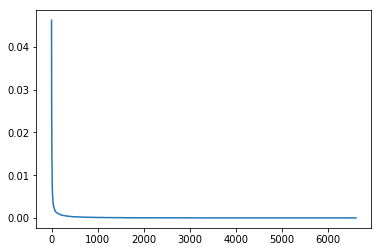

In [13]:
import matplotlib.pyplot as plt
plt.plot([v for k,v in sorted_words_frequency])

Задание 3.
Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [16]:
# Пункт 3

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopWords = stopwords.words('english')
hp_wo_stopwords = [w for w in word_tokenize(hp_text_lc_wo_punctuation_lemmatized) if w not in stopWords]
print(hp_wo_stopwords[:30])

['chapter', 'one', 'boy', 'live', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'youd', 'expect', 'involve', 'anything', 'strange', 'mysterious', 'didnt', 'hold', 'nonsense', 'mr', 'dursley']
